# House Price Prediction 

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [2]:
## Loading the dataset
data = pd.read_csv("Raw_Housing_Prices.csv")
pd.set_option("display.max_columns", None) # To display all the columns
pd.set_option("display.max_rows", None) # To display all the rows
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
## Checking the shape of the dataset
data.shape

(21613, 21)

In [4]:
## Getting the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [5]:
## checking the description of the target variable "Sale Price".
data["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

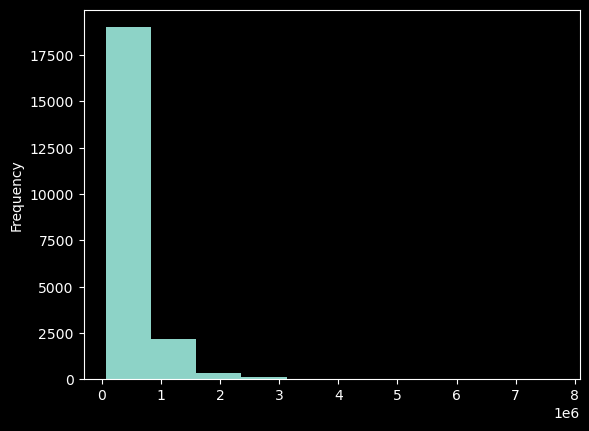

In [6]:
## ploting the target variable
data["Sale Price"].plot.hist()

In [7]:
## checking for outliers in the target variable.
# calculating the q1 and q3
q1 = data["Sale Price"].quantile(0.25)
q3 = data["Sale Price"].quantile(0.75)
q1, q3

(321950.0, 645000.0)

In [8]:
# calculating the iqr
iqr = q3 - q1
iqr

323050.0

In [9]:
# calculating the upper and lower bound
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
upper_bound, lower_bound

(1129575.0, -162625.0)

In [10]:
# defining a function to calculate the outliers and replace it with upper or lower bound.
def calc_outliers(value):
    if value > upper_bound:
        return upper_bound
    if value < lower_bound:
        return lower_bound
    else: 
        return value

In [11]:
data["Sale Price"] = data["Sale Price"].apply(calc_outliers)

In [12]:
data["Sale Price"].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

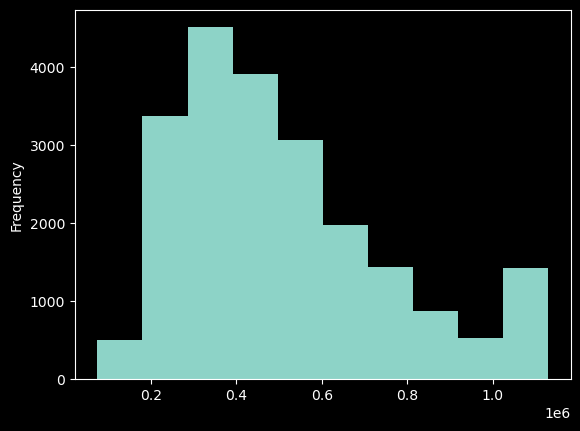

In [13]:
## Again ploting after imputation
data["Sale Price"].plot.hist()

In [14]:
## Let's check the missing values
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [15]:
## droping the rows with null values present in the "Sale Price" column.
data.dropna(subset=['Sale Price'], inplace=True)

In [16]:
data["Sale Price"].isnull().sum()

0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [18]:
# select only numerical columns with missing values
numerical_columns =['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']
numerical_columns

['No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']

In [19]:
# select only categorical columns with missing values
cat_cols_with_null = [col for col in data.select_dtypes(include=['object']).columns if data[col].isnull().any()]
cat_cols_with_null

[]

In [20]:
## imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "median")
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [21]:
data.isnull().sum().sum()

1

In [22]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


## Data Transformation

In [23]:
data["Zipcode"].head(10)

0    98178.0
1    98125.0
2    98028.0
3    98136.0
4    98074.0
5    98053.0
6    98003.0
7    98198.0
8    98146.0
9    98038.0
Name: Zipcode, dtype: float64

In [24]:
data["No of Times Visited"].value_counts()

None      19485
Twice       963
Thrice      510
Once        332
Four        319
Name: No of Times Visited, dtype: int64

### Zipcode 

In [25]:
data["Zipcode"] = data["Zipcode"].astype("object")

In [26]:
column = data["Zipcode"].values.reshape(-1,1)

In [27]:
imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
data["Zipcode"] = imputer.fit_transform(column)

In [28]:
data["Zipcode"].isnull().sum()

0

### No. of Times Visited

In [29]:
data["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [30]:
## mapping the values
## We are using the Label encoding
mapping = {
    "None" : "0",
    "Once" : "1",
    "Twice" : "2",
    "Thrice" : "3",
    "Four" : "4"
}

In [31]:
data["No of Times Visited"] = data["No of Times Visited"].map(mapping)

In [32]:
data["No of Times Visited"].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [33]:
## Assigning a new variable "Ever Renovated", which will contain boolean values.
data["Ever Renovated"] = np.where(data["Renovated Year"] == 0, "No", "Yes")

In [34]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [35]:
## Extracting the Purchase Year from the variable "Date House was Sold".
data["Purchase Year"] = pd.DatetimeIndex(data["Date House was Sold"]).year

## Assinging a new variable "Year Since Renovation".
data["Years Since Renovation"] = np.where(data["Ever Renovated"] == "Yes",
                                         abs(data["Purchase Year"] - data["Renovated Year"]),0)

In [36]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [37]:
## Now we can drop the columns we don't want.
data.drop(columns = ["Purchase Year", "Date House was Sold", "Renovated Year"], inplace = True, axis = 1)

In [38]:
## Dropping the ID column
data.drop(columns = "ID", inplace=True)

In [39]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


## Data Visualization

In [40]:
data["Condition of the House"].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

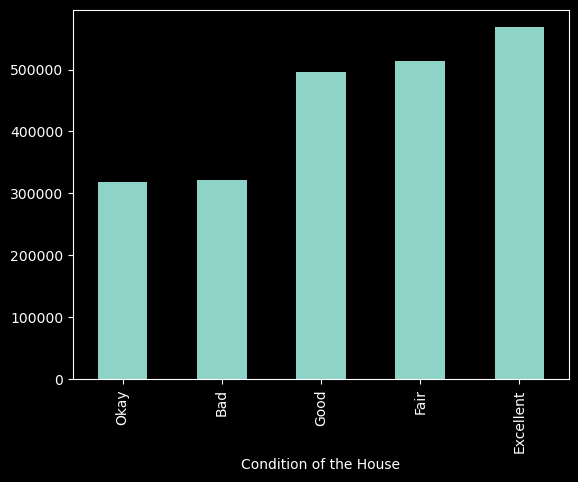

In [41]:
## Plotting the averge "Sale Price" with respect to the Condition of the House".
data.groupby("Condition of the House")["Sale Price"].mean().sort_values().plot(kind = "bar")

In [42]:
data["Waterfront View"].value_counts()

No     21446
Yes      163
Name: Waterfront View, dtype: int64

<AxesSubplot:xlabel='Waterfront View'>

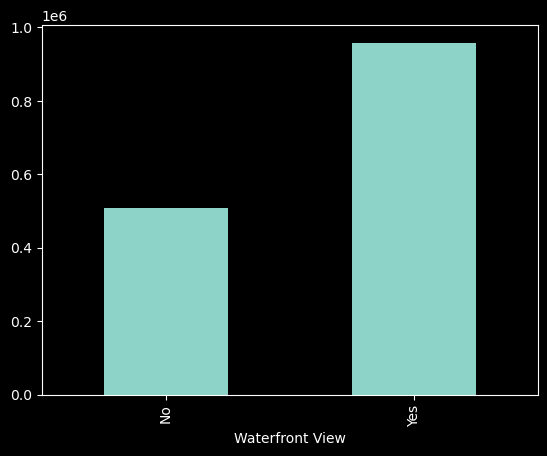

In [43]:
## Plotting the average "Sale Price" with respect to "Waterfront View".
data.groupby("Waterfront View")["Sale Price"].mean().sort_values().plot(kind = "bar")

In [44]:
data["Ever Renovated"].value_counts()

No     20695
Yes      914
Name: Ever Renovated, dtype: int64

<AxesSubplot:xlabel='Ever Renovated'>

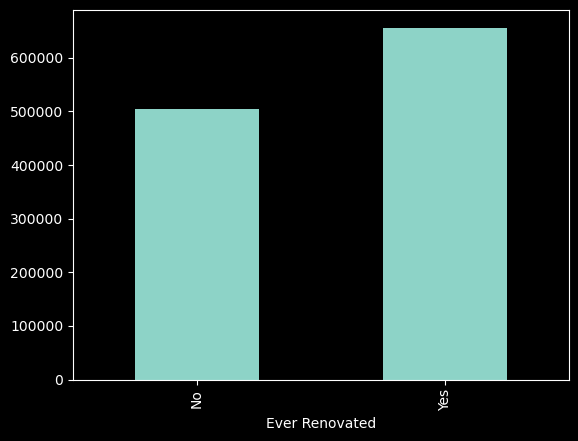

In [45]:
## Plotting the average "Sale Price" with respect to "Ever Renovated"
data.groupby("Ever Renovated")["Sale Price"].mean().sort_values().plot(kind = "bar")

### Variable Transformation

In [46]:
data.dropna(inplace=True)

## Spliting the data into dependent and independent columns
X = data.drop(columns=["Sale Price"])
Y = data["Sale Price"]

In [47]:
## Checking disributions of numerical independent variables
def distributions(data, var):
    plt.figure(figsize = (len(var)*6,6), dpi = 120)
    for i, j in enumerate(var):
        plt.subplot(1, len(var), i+1)
        plt.hist(data[j])
        plt.title(j)

In [48]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [49]:
for i in numerical_columns:
    X[i] = pd.to_numeric(X[i])

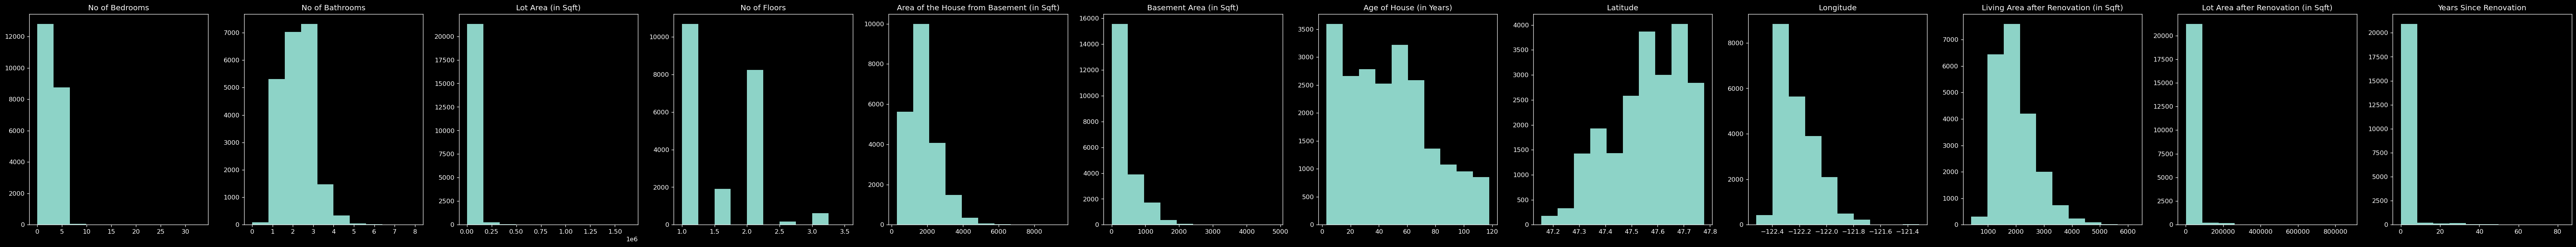

In [50]:
distributions(X, numerical_columns)

In [51]:
def right_skew(var):
    return np.log(abs(var+500))

In [52]:
right_skewed_cols = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [53]:
for i in right_skewed_cols:
    X[i] = X[i].map(right_skew)

In [54]:
## removing the infinite values if exist
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

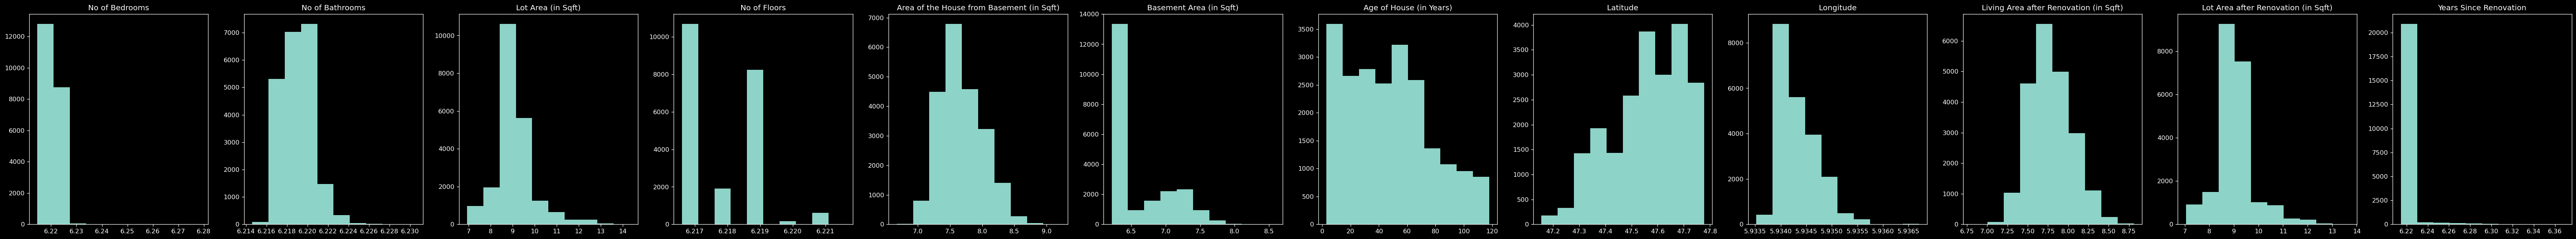

In [55]:
distributions(X, numerical_columns)

In [56]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,No,0,Fair,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,No,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,No,0,Fair,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,Yes,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,No,0,Fair,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,No,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,No,0,Excellent,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,No,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,No,0,Fair,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,No,6.214608


In [57]:
X.shape

(21609, 19)

In [58]:
## Level encoding of all the categorical variables
print(X["Waterfront View"].value_counts())
print("-"*30)
print(X["Condition of the House"].value_counts())
print("-"*30)
print(X["Ever Renovated"].value_counts())

No     21446
Yes      163
Name: Waterfront View, dtype: int64
------------------------------
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64
------------------------------
No     20695
Yes      914
Name: Ever Renovated, dtype: int64


In [59]:
X["Waterfront View"] = X["Waterfront View"].map({"No":0, "Yes":1})

X["Condition of the House"] = X["Condition of the House"].map({"Bad":1,
                                                               "Okay":2,
                                                               "Fair":3,
                                                               "Good":4,
                                                               "Excellent":5})

X["Ever Renovated"] = X["Ever Renovated"].map({"No":0, "Yes":1})

In [60]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,0,0,3,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,0,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,0,0,3,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,1,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,0,0,3,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,0,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,0,0,5,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,0,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,0,0,3,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,0,6.214608


## Scaling the dataset

In [61]:
## Importing the StandardSaler class from sklearn llibrary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() ## creating the scaler object
X1 = scaler.fit_transform(X) ## fitting the model
X = pd.DataFrame(data = X1, columns = X.columns)
Y = data["Sale Price"]
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.30579,-0.629203,-0.563993,-0.767588,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.30579,-0.629203,-0.563993,0.642025,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.30579,-0.629203,-1.468566,-1.618851,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,-0.30579,2.444136,-0.563993,-1.012639,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.30579,-0.629203,0.340581,0.025117,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


## Checking and Removing Multicollinearity

In [62]:
## Checking the correlation with the help of corr() function.
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
No of Bedrooms,1.000000,0.516645,0.577469,0.175425,0.175995,-0.006617,0.079649,0.028514,0.349933,0.509475,0.276781,-0.154613,-0.153163,-0.008867,0.129997,0.404806,0.154329,0.018555,-0.006734
No of Bathrooms,0.516645,1.000000,0.754415,0.105010,0.500980,0.063683,0.187657,-0.124874,0.635778,0.696041,0.254042,-0.506206,-0.204097,0.024506,0.223332,0.572407,0.095798,0.050239,0.004644
Flat Area (in Sqft),0.577469,0.754415,1.000000,0.341571,0.354268,0.103841,0.284678,-0.058922,0.705725,0.853690,0.373296,-0.318146,-0.199380,0.052538,0.240124,0.739515,0.318573,0.055111,0.024552
Lot Area (in Sqft),0.175425,0.105010,0.341571,1.000000,-0.218404,0.074316,0.121698,0.066113,0.165808,0.319715,0.056278,-0.006100,-0.279267,-0.145945,0.376102,0.361633,0.917835,0.022789,0.033036
No of Floors,0.175995,0.500980,0.354268,-0.218404,1.000000,0.023721,0.029503,-0.263676,0.461442,0.548408,-0.266598,-0.489232,-0.059289,0.049640,0.125724,0.277817,-0.210687,0.006318,-0.000379
Waterfront View,-0.006617,0.063683,0.103841,0.074316,0.023721,1.000000,0.401856,0.016650,0.070332,0.063294,0.063276,0.026149,0.030286,-0.014275,-0.041934,0.080573,0.083232,0.093291,0.105822
No of Times Visited,0.079649,0.187657,0.284678,0.121698,0.029503,0.401856,1.000000,0.045978,0.223661,0.161106,0.249446,0.053395,0.084830,0.006162,-0.078472,0.268524,0.118788,0.104051,0.094621
Condition of the House,0.028514,-0.124874,-0.058922,0.066113,-0.263676,0.016650,0.045978,1.000000,-0.143747,-0.153588,0.176043,0.361383,0.003076,-0.015008,-0.106546,-0.090182,0.073370,-0.060152,-0.012115
Overall Grade,0.349933,0.635778,0.705725,0.165808,0.461442,0.070332,0.223661,-0.143747,1.000000,0.723789,0.116078,-0.456711,-0.185844,0.111226,0.201765,0.676795,0.167561,0.010010,-0.023473
Area of the House from Basement (in Sqft),0.509475,0.696041,0.853690,0.319715,0.548408,0.063294,0.161106,-0.153588,0.723789,1.000000,-0.111289,-0.448692,-0.285278,-0.015269,0.360187,0.720753,0.301163,0.026070,0.013457


In [63]:
## filtering pair of independent variables with correlation greater than 0.5 or 50%.
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
print("There are "+str(len(z))+" pairs")
z

There are 34 pairs


[['No of Bedrooms', 'No of Bathrooms'],
 ['No of Bedrooms', 'Flat Area (in Sqft)'],
 ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
 ['No of Bathrooms', 'No of Bedrooms'],
 ['No of Bathrooms', 'Flat Area (in Sqft)'],
 ['No of Bathrooms', 'No of Floors'],
 ['No of Bathrooms', 'Overall Grade'],
 ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
 ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
 ['Flat Area (in Sqft)', 'No of Bedrooms'],
 ['Flat Area (in Sqft)', 'No of Bathrooms'],
 ['Flat Area (in Sqft)', 'Overall Grade'],
 ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
 ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
 ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
 ['No of Floors', 'No of Bathrooms'],
 ['No of Floors', 'Area of the House from Basement (in Sqft)'],
 ['Overall Grade', 'No of Bathrooms'],
 ['Overall Grade', 'Flat Area (in Sqft)'],
 ['Overall Grade', 'Area of the House 

### calculating VIF

In [64]:
## imputing Variance_inflation_Factor function
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.736931
No of Bathrooms                               3.424393
Flat Area (in Sqft)                          21.514533
Lot Area (in Sqft)                            6.844926
No of Floors                                  2.388708
Waterfront View                               1.211015
No of Times Visited                           1.415596
Condition of the House                        1.260549
Overall Grade                                 2.905865
Area of the House from Basement (in Sqft)    23.289239
Basement Area (in Sqft)                       6.561328
Age of House (in Years)                       2.458302
Zipcode                                       1.668833
Latitude                                      1.191495
Longitude                                     1.880317
Living Area after Renovation (in Sqft)        2.917259
Lot Area after Renovation (in Sqft)           6.603083
Ever Renovated                                3.022760
Years Sinc

In [65]:
## removing the columns with vif more than 0.5
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print('No Multicollinearity present anymore')
        return data

In [66]:
for i in range(7):
    vif_data = MC_remover(vif_data)

vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.915604,-0.087181,-0.30579,-0.629203,-0.563993,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.937193,-0.087181,-0.30579,-0.629203,-0.563993,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-0.915604,-0.087181,-0.30579,-0.629203,-1.468566,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.915604,-0.087181,-0.30579,2.444136,-0.563993,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.915604,-0.087181,-0.30579,-0.629203,0.340581,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


In [67]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
print("There are "+str(len(VIF))+" columns")
VIF

There are 16 columns


No of Bedrooms                            1.498157
No of Bathrooms                           2.950107
No of Floors                              2.185237
Waterfront View                           1.209171
No of Times Visited                       1.410593
Condition of the House                    1.253804
Overall Grade                             2.541427
Basement Area (in Sqft)                   1.639834
Age of House (in Years)                   2.392439
Zipcode                                   1.666011
Latitude                                  1.183389
Longitude                                 1.857951
Living Area after Renovation (in Sqft)    2.503466
Lot Area after Renovation (in Sqft)       1.552630
Ever Renovated                            3.017581
Years Since Renovation                    2.868474
dtype: float64

## Renaming Columns

In [68]:
X = vif_data[:]
X.shape

(21609, 16)

## Train/Test set

In [69]:
## dividing the data into training and testing datasets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 16), (6483, 16), (15126,), (6483,))

## Training Linear Regression Model

In [70]:
## Training the Linear Regression model using sklearn library
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [71]:
## Checking the coefficients usnig coef_ attribute.
lr.coef_

array([  1584.86669312,  42601.67421626,  23310.57525319,   9989.31321342,
        30480.01914579,  16059.91826464, 108934.75599668,  11330.36808308,
        65047.79835963, -15608.43858763,  75617.37499127,  -7749.57798632,
        54292.09103532,   2016.74778297,  16444.49611058, -11320.49390293])

In [72]:
## making the presictions using the predict() method
predictions = lr.predict(x_test)

In [73]:
## Checking the score of our model
lr.score(x_test, y_test)

0.7344495220499552

## Evaluating the model

### 1. Reciduals

In [74]:
## Calculating the residuals of our model
residuals = predictions - y_test

residual_table = pd.DataFrame({"residuals": residuals,
                               "predictions": predictions})
residual_table = residual_table.sort_values(by = "predictions")

In [75]:
z = [i for i in range(int(residual_table["predictions"].max()))]
k = [0 for i in range(int(residual_table["predictions"].max()))]

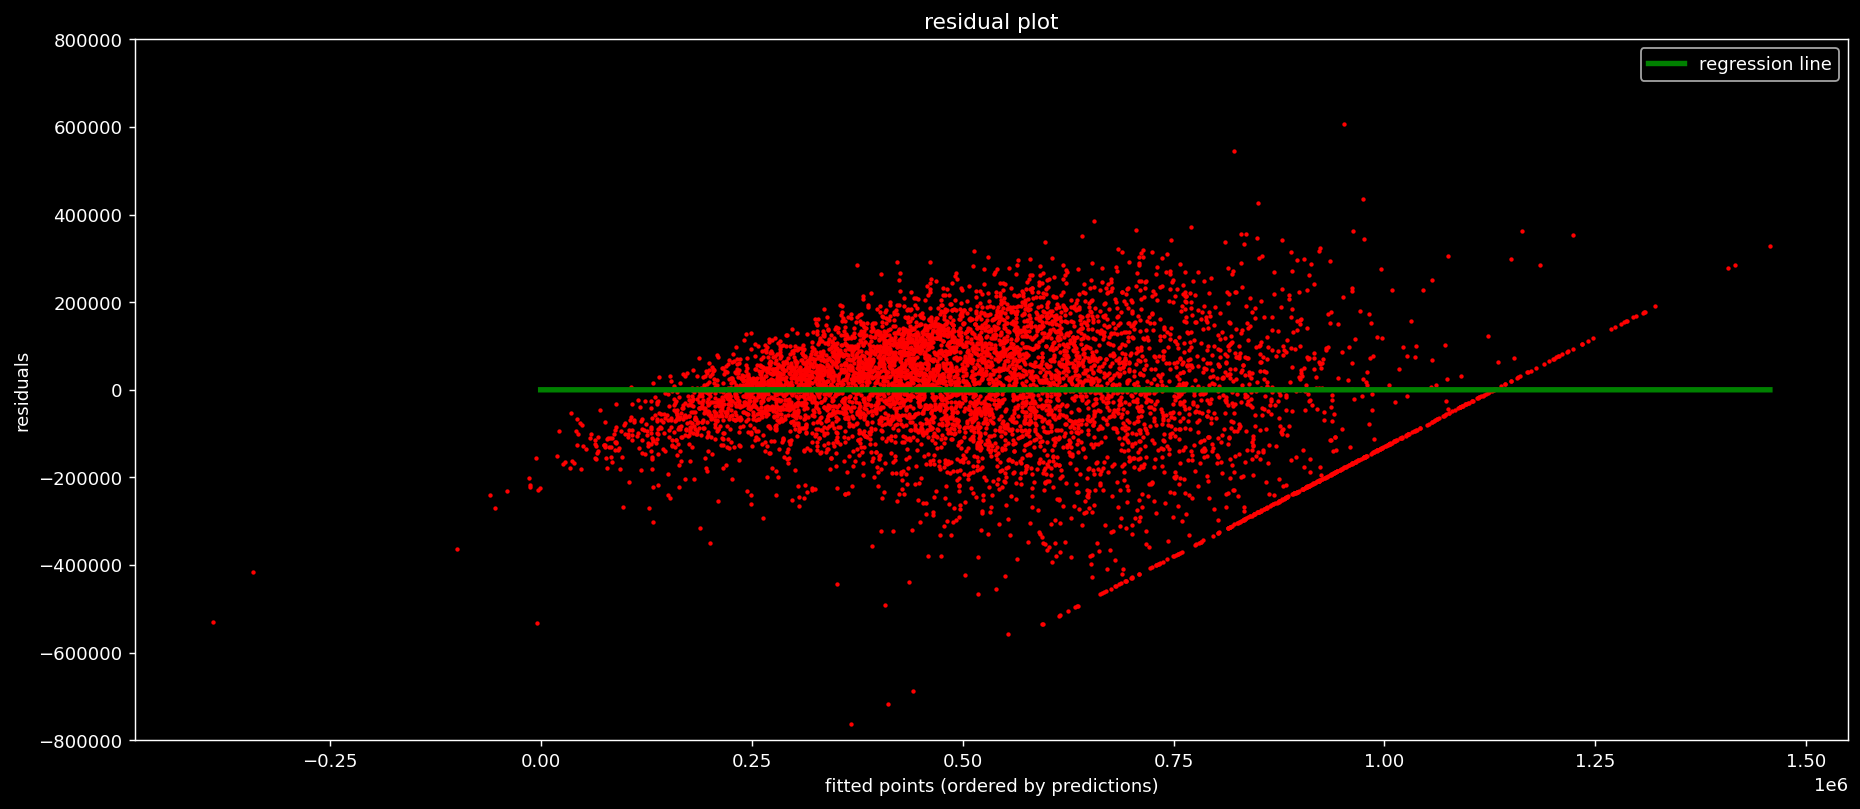

In [76]:
## Plotting the residuals in a scatter plot
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter(residual_table["predictions"], residual_table["residuals"], color = "red", s=2)
plt.plot(z, k, color = "green", linewidth = 3, label = "regression line")
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

### 2. Distribution of Errors

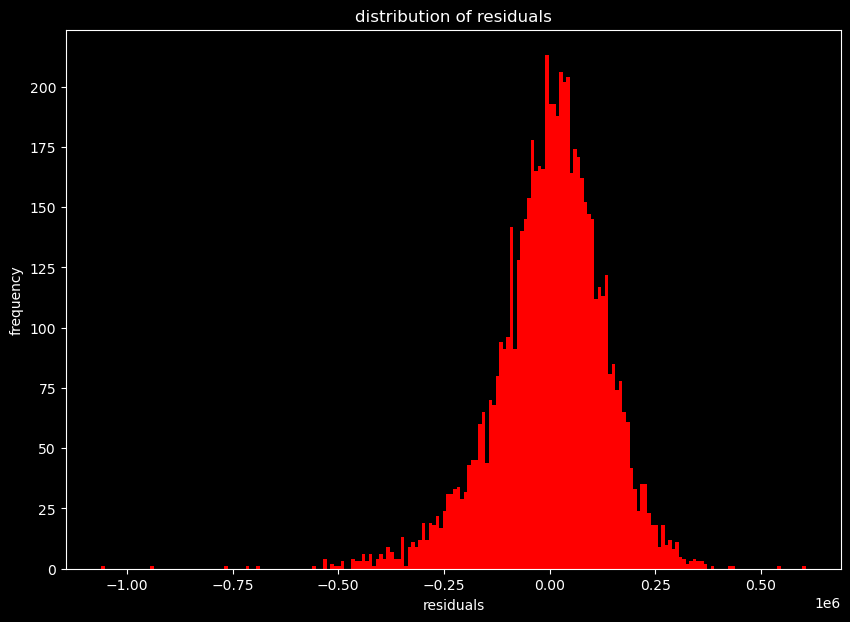

In [77]:
## Plotting the residuals in a histogram to check the distribution
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model coefficients

In [78]:
coefficients_table = pd.DataFrame({
    "column" : x_train.columns,
    "coefficients" : lr.coef_
})
coefficients_table = coefficients_table.sort_values(by = "coefficients")

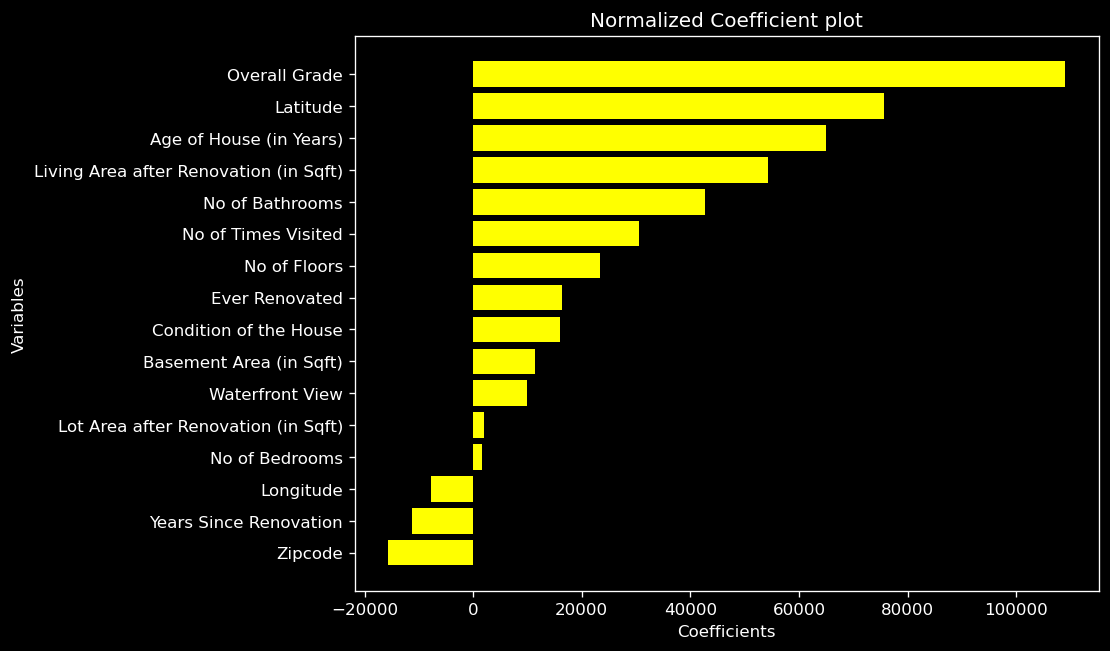

In [79]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficients_table['column']
y = coefficients_table['coefficients']
plt.barh( x, y, color = "yellow")
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

In [80]:
# Print the predicted prices
for i, price in enumerate(predictions):
    print(f"Predicted price for house {i+1}: ${price:.2f}")

Predicted price for house 1: $608501.71
Predicted price for house 2: $648411.79
Predicted price for house 3: $445444.04
Predicted price for house 4: $491044.16
Predicted price for house 5: $977134.61
Predicted price for house 6: $703202.79
Predicted price for house 7: $458992.38
Predicted price for house 8: $591986.32
Predicted price for house 9: $495588.14
Predicted price for house 10: $444526.10
Predicted price for house 11: $306369.77
Predicted price for house 12: $392508.04
Predicted price for house 13: $619561.31
Predicted price for house 14: $396934.29
Predicted price for house 15: $880101.03
Predicted price for house 16: $528640.41
Predicted price for house 17: $311892.72
Predicted price for house 18: $529306.28
Predicted price for house 19: $441154.97
Predicted price for house 20: $370316.24
Predicted price for house 21: $491005.79
Predicted price for house 22: $405745.02
Predicted price for house 23: $390003.49
Predicted price for house 24: $382010.10
Predicted price for house

In [81]:
len(predictions)

6483